In [1]:
# using StatsBase, Random
using BioTools, BioSequences, TreeTools, EarthMoversDistance
using Plots
using Dates
using FastaIO
using StatsBase
include("functions/Predictions_updated.jl")

┌ Info: Recompiling stale cache file /home/pierrebc/.julia/compiled/v1.1/BioTools.ji for BioTools [top-level]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /home/pierrebc/.julia/compiled/v1.1/EarthMoversDistance.ji for EarthMoversDistance [top-level]
└ @ Base loading.jl:1184


cluster_lbi_maxima!

In [19]:
pyplot();

In [20]:
fp = Flu.AAFluPop("../data/newtrees/100_per_4month/aligned_ha_aa.fasta", [:strain,:?,:?,:date]);

Reading ../data/newtrees/100_per_4month/aligned_ha_aa.fasta...
Read 4402 strains out of 4402. Filtered 0. Could not read 0


In [21]:
Flu.bin_by_date!(fp, start=Date(2002,12,1), binwidth=Day(121), binspacing=Day(121));
datebins = sort(collect(keys(fp.datebin)));

In [22]:
t = read_tree("../data/newtrees/100_per_4month/results/tree_raw.nwk", NodeDataType=LBIData);

  0.289696 seconds (1.13 M allocations: 131.979 MiB, 17.95% gc time)


In [23]:
pop1 = fp.datebin[datebins[1]]
pop2 = fp.datebin[datebins[5]]
@show tmp=consensus(pop1).seq
@show hamming(Profile(pop1), Profile(pop2))
@show hamming(Profile(pop1), pop2[1])

tmp = (consensus(pop1)).seq = MKTIIALSYILCLVFAQKLPGNDNSTATLCLGHHAVPNG…KDWILWISFAISCFLLCVALLGFIMWACQKGNIRCNICI
hamming(Profile(pop1), Profile(pop2)) = 10.461483739837398
hamming(Profile(pop1), pop2[1]) = 12.366463414634147


12.366463414634147

In [24]:
@time Profile(pop1)

  0.008332 seconds (151.12 k allocations: 2.570 MiB)


Profile{AminoAcid}(SiteFrequency{AminoAcid}[SiteFrequency{AminoAcid}(1, 41, Dict(AA_M=>1.0)), SiteFrequency{AminoAcid}(2, 41, Dict(AA_K=>1.0)), SiteFrequency{AminoAcid}(3, 41, Dict(AA_T=>1.0)), SiteFrequency{AminoAcid}(4, 41, Dict(AA_I=>1.0)), SiteFrequency{AminoAcid}(5, 41, Dict(AA_I=>1.0)), SiteFrequency{AminoAcid}(6, 41, Dict(AA_A=>1.0)), SiteFrequency{AminoAcid}(7, 41, Dict(AA_L=>1.0)), SiteFrequency{AminoAcid}(8, 41, Dict(AA_S=>1.0)), SiteFrequency{AminoAcid}(9, 41, Dict(AA_Y=>1.0)), SiteFrequency{AminoAcid}(10, 41, Dict(AA_I=>1.0))  …  SiteFrequency{AminoAcid}(557, 41, Dict(AA_K=>1.0)), SiteFrequency{AminoAcid}(558, 41, Dict(AA_G=>1.0)), SiteFrequency{AminoAcid}(559, 41, Dict(AA_N=>1.0)), SiteFrequency{AminoAcid}(560, 41, Dict(AA_I=>1.0)), SiteFrequency{AminoAcid}(561, 41, Dict(AA_R=>1.0)), SiteFrequency{AminoAcid}(562, 41, Dict(AA_C=>1.0)), SiteFrequency{AminoAcid}(563, 41, Dict(AA_D=>0.0243902,AA_N=>0.97561)), SiteFrequency{AminoAcid}(564, 41, Dict(AA_I=>1.0)), SiteFrequency{Am

In [25]:
@time Profile(pop1)

  0.028229 seconds (151.12 k allocations: 2.570 MiB, 76.47% gc time)


Profile{AminoAcid}(SiteFrequency{AminoAcid}[SiteFrequency{AminoAcid}(1, 41, Dict(AA_M=>1.0)), SiteFrequency{AminoAcid}(2, 41, Dict(AA_K=>1.0)), SiteFrequency{AminoAcid}(3, 41, Dict(AA_T=>1.0)), SiteFrequency{AminoAcid}(4, 41, Dict(AA_I=>1.0)), SiteFrequency{AminoAcid}(5, 41, Dict(AA_I=>1.0)), SiteFrequency{AminoAcid}(6, 41, Dict(AA_A=>1.0)), SiteFrequency{AminoAcid}(7, 41, Dict(AA_L=>1.0)), SiteFrequency{AminoAcid}(8, 41, Dict(AA_S=>1.0)), SiteFrequency{AminoAcid}(9, 41, Dict(AA_Y=>1.0)), SiteFrequency{AminoAcid}(10, 41, Dict(AA_I=>1.0))  …  SiteFrequency{AminoAcid}(557, 41, Dict(AA_K=>1.0)), SiteFrequency{AminoAcid}(558, 41, Dict(AA_G=>1.0)), SiteFrequency{AminoAcid}(559, 41, Dict(AA_N=>1.0)), SiteFrequency{AminoAcid}(560, 41, Dict(AA_I=>1.0)), SiteFrequency{AminoAcid}(561, 41, Dict(AA_R=>1.0)), SiteFrequency{AminoAcid}(562, 41, Dict(AA_C=>1.0)), SiteFrequency{AminoAcid}(563, 41, Dict(AA_D=>0.0243902,AA_N=>0.97561)), SiteFrequency{AminoAcid}(564, 41, Dict(AA_I=>1.0)), SiteFrequency{Am

In [26]:
tmp == refcons1

UndefVarError: UndefVarError: refcons1 not defined

In [27]:
if false 
    pop1 = fp.datebin[datebins[1]]
    pop2 = fp.datebin[datebins[5]]
    const refcons1 = consensus(pop1).seq
    @show hamming(Profile(pop1), Profile(pop2))
    @show hamming(Profile(pop1), pop2[1])
end

# Using a single sequence to predict the future

We'll use different single sequence predictors: 
- a random sequence from current population
- the max. lbi from current pop. 
- the consensus
- as a comparison, the best possible? 

Efficiency of those predictors will be measured using the mean hamming distance to the future. 

In [28]:
# LBI will be computed for each datebin, using only strains alive in this bin
best_tau = 3*Flu.substitution_rate["h3n2","ha"]
Flu.get_lbi!(fp, t, :datebin, τ = best_tau)

In [33]:
pred_rand = Dict(); pred_lbi = Dict(); pred_cons = Dict(); pred_best = Dict(); pred_lbi_utau = Dict()
idx = 1:length(datebins)-8
# idx = 1:
@time for i in idx
    print("i = $i/$(length(idx))             \r"); flush(stdout)
    db = datebins[i]
    pop = fp.datebin[db]
    prof = Profile(pop)
    cons = consensus(prof)
    maxlbi = reduce(values(fp.strains)) do x,y
        ismissing(x[:lbi]) && return y
        ismissing(y[:lbi]) && return x
        x[:lbi] > y[:lbi] ? x : y
    end
    ismissing(maxlbi[:lbi]) && @warn "No lbi value - $db"
    for db2 in datebins[i:i+8]
        dt = db2[1] - db[1]
        fpop = fp.datebin[db2]
        fprof = Profile(fpop)
        pred_rand[dt] = get(pred_rand, dt, 0.) + hamming(prof, fprof) /length(idx)
        pred_lbi[dt] = get(pred_lbi, dt, 0.) + hamming(maxlbi, fprof) /length(idx)
        pred_cons[dt] = get(pred_cons, dt, 0.) + hamming(cons, fprof) /length(idx)
    end
end
pred_rand = sort(pred_rand); pred_lbi = sort(pred_lbi); pred_cons = sort(pred_cons);

  5.550313 seconds (144.47 M allocations: 2.267 GiB, 8.60% gc time)


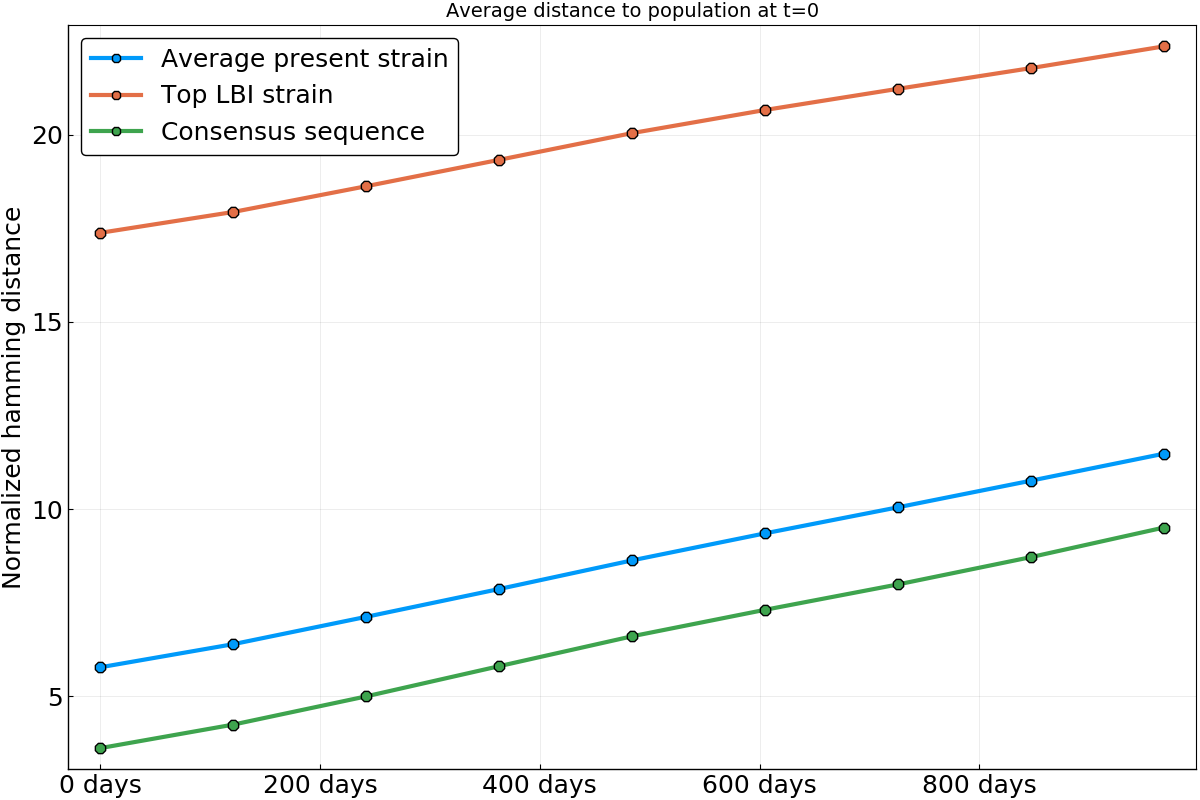

In [34]:
ts = [x[1] for x in pred_rand]
prand = [x[2] for x in pred_rand]
pcons = [x[2] for x in pred_cons]
plbi = [x[2] for x in pred_lbi]
plbi_utau = [x[2] for x in pred_lbi_utau]

p = plot(ts, prand, label="Average present strain", marker=:o, markersize=8, linewidth=3)
plot!(ts, plbi, label="Top LBI strain", marker=:o, markersize=8, linewidth=3)
# plot!(ts, plbi_utau, label="Top LBI strain (usual tau)", marker=:o)
plot!(ts, pcons, label="Consensus sequence", marker=:o, markersize=8, linewidth=3)
# plot!(ts, toplbih, label="Top LBI", marker=:o)
plot!(ylabel="Normalized hamming distance", title="Average distance to population at t=0");
plot!(p, legendfontsize = 18, axisfontsize = 18, tickfontsize=18, guidefontsize=18)
plot!(p, size = (1200,800), frame=:boxed)

In [35]:
savefig("tempplots_predictions/hammingdistance_to_future.png");

## How close is the top lbi strain to the consensus? 

In [36]:
dat = Dict()
for db in datebins
    pop = fp.datebin[db]
    prof = Profile(pop)
    toplbi = reduce((x,y) -> x[:lbi] > y[:lbi] ? x : y, pop)
    cons = consensus(prof)
    dat[db] = (poptocons=hamming(prof,cons), lbitocons=hamming(toplbi.seq, cons))
end
dat = sort(dat);

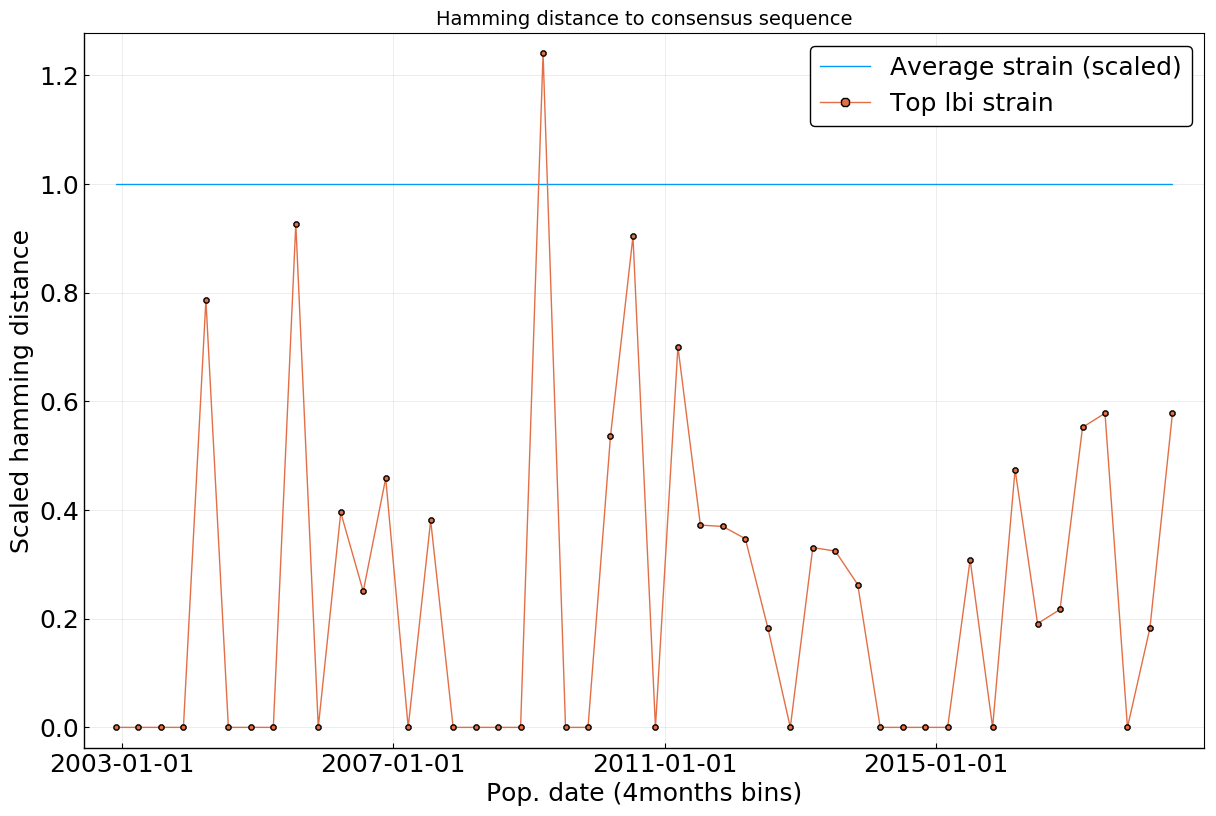

In [37]:
p = plot([x[1] for x in keys(dat)], ones(length(values(dat))), label="Average strain (scaled)")
plot!([x[1] for x in keys(dat)], [x.lbitocons for x in values(dat)]./[x.poptocons for x in values(dat)], label="Top lbi strain", marker=:o)
plot!(xlabel="Pop. date (4months bins)", ylabel="Scaled hamming distance", title="Hamming distance to consensus sequence")
plot!(p, legendfontsize = 18, axisfontsize = 18, tickfontsize=18, guidefontsize=18)
plot!(p, size = (1200,800), frame=:boxed)
savefig("tempplots_predictions/hammingdistance_to_consensus_vs_date.png")


In [38]:
dat_db = []; dat_aa = []
ctvalues = [1,10,50,100,200,500,1000,5000,10000]; # in days
for ct in ctvalues # Integration time in days for LBI
    print("Integration time: $ct days                     \r")
    tau = ct/ 365 * Flu.substitution_rate["h3n2", "ha"]
    Flu.get_lbi!(fp, t, :datebin, τ=tau, lbi_field = "lbi_datebin")
    Flu.get_lbi!(fp, t, :all_anterior, τ=tau, lbi_field = "lbi_allanterior")
    ydb = 0.; yaa = 0.
    for db in datebins
        pop = fp.datebin[db]
        prof = Profile(pop)
        toplbi_db = reduce((x,y) -> x[:lbi_datebin] > y[:lbi_datebin] ? x : y, pop)
        toplbi_aa = reduce((x,y) -> x[:lbi_allanterior] > y[:lbi_allanterior] ? x : y, pop)
        cons = consensus(prof)
        ydb += hamming(toplbi_db.seq,cons) / hamming(prof, cons)
        yaa += hamming(toplbi_aa.seq,cons) / hamming(prof, cons)
    end
    push!(dat_db, ydb/length(datebins))
    push!(dat_aa, yaa/length(datebins))
end

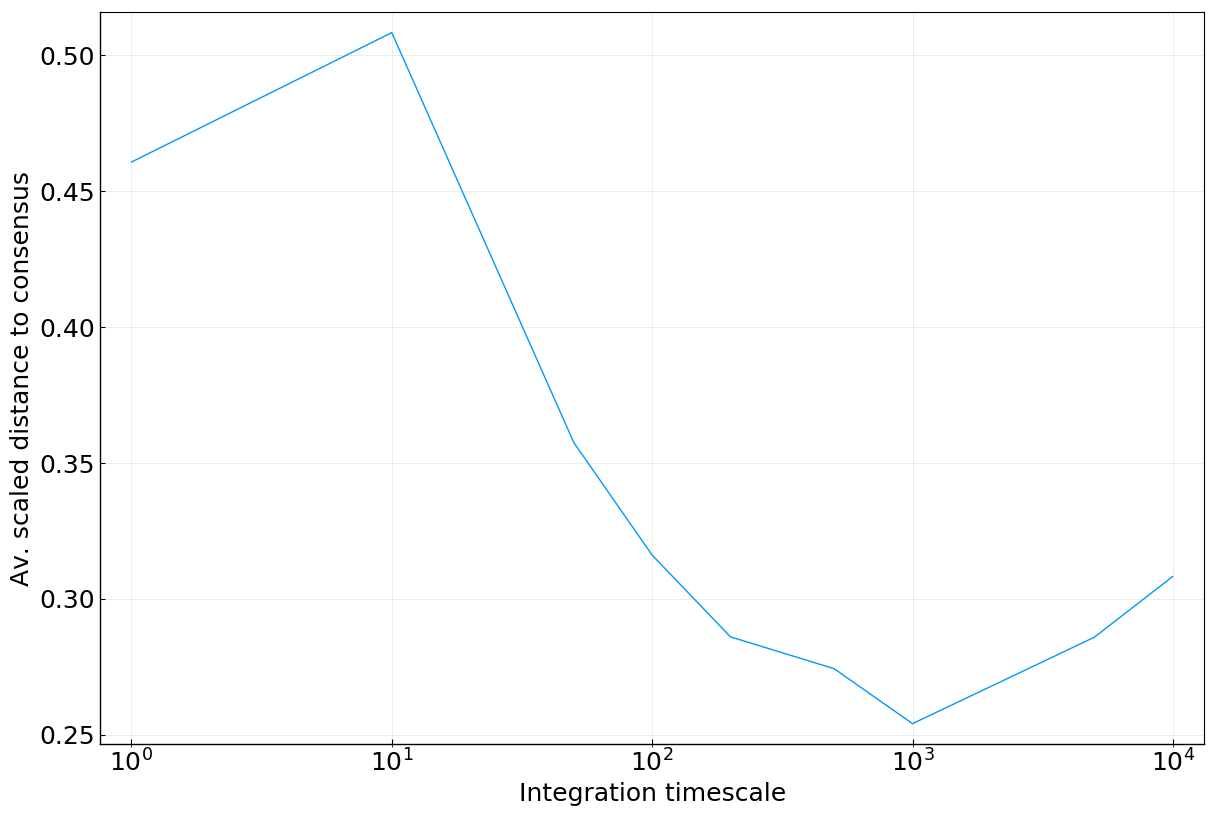

In [39]:
p = plot(ctvalues, dat_db, xscale=:log10, label="")
plot!(xlabel = "Integration timescale", ylabel="Av. scaled distance to consensus")
plot!(p, legendfontsize = 18, axisfontsize = 18, tickfontsize=18, guidefontsize=18)
plot!(p, size = (1200,800), frame=:boxed)
savefig("tempplots_predictions/hammingdistance_to_consensus_vs_LBItime.png")

# Using several weighted sequences to predict the future

## Cluster sequences around LBI maximas
- For each datebin, find all local maximas of the LBI. Those will be centers of clusters. 
- For each strain in the datebin, find the local maxima it is closest to in terms of *branch length distance* .
- This gives us clusters and weights (number of strains per cluster). It can be used as a proxy for the future population

In [43]:
tmp = cluster_lbi_maxima!(t, fp)
clusters = tmp[1];
clusters_lbi = tmp[2];

In [44]:
# What are these clusters? How big are they? How evenly split are sequences? 
# How far are sequences from the cluster consensus (*i.e.* are the clusters a good summary of the sequences? )
# Can I weigh clusters by LBI value? If this is less efficient than the size, it shows smth 

In [45]:
# Get consensus and weight for each cluster
# In get_predictor_bysize, weight is determined by the number of sequences in the cluster
# In get_predictor_bylbi, weight is determined by the lbi value of the corresponding local maxima
function get_predictor_bysize(clusters::Dict, fp)
    Z = Float64(sum(length(x[2]) for x in clusters))
    out = Dict{BioSequence, Float64}()
    for c in values(clusters)
        cons = BioTools.consensus([fp.strains[x].seq for x in c])
        out[cons] = get(out, cons, 0.) + length(c) / Z
    end
    return out
end
function get_predictor_bylbi(clusters::Dict, lbivals::Dict, fp)
    Z = sum(lbivals[n] for n in keys(clusters)) # Empty clusters are removed, so lbivals can have more keys
    out = Dict{BioSequence, Float64}()
    for (n,c) in clusters
        cons = BioTools.consensus([fp.strains[x].seq for x in c])
        out[cons] = get(out, cons, 0.) + lbivals[n] / Z
    end
    return out
end

get_predictor_bylbi (generic function with 1 method)

In [46]:
## Warning : quite long to run! 
pred_cons = Dict(); pred_clusters = Dict(); pred_all= Dict()
idx = 1:length(datebins)-8
for i in idx
    db = datebins[i]
    println(db, "")
    predictor_cons = Dict(BioTools.consensus(fp.datebin[db]).seq => 1.) # Overall consensus with weight 1
    predictor_clusters = get_predictor_bysize(clusters[db], fp) # Clusterwise consensuses
    predictor_all = EarthMoversDistance.sequence_distribution(fp.datebin[db]) # All pop. 
    for db2 in datebins[i:i+8]
        future_distribution = EarthMoversDistance.sequence_distribution(fp.datebin[db2])
        # Distance for all three predictors
        pred_cons[db2[1]-db[1]] = get(pred_cons, db2[1] - db[1], 0.) + EMD(predictor_cons, future_distribution).emd / length(idx)
        pred_clusters[db2[1]-db[1]] = get(pred_clusters, db2[1] - db[1], 0.) + EMD(predictor_clusters, future_distribution).emd / length(idx)
        pred_all[db2[1]-db[1]] = get(pred_all, db2[1] - db[1], 0.) + EMD(predictor_all, future_distribution).emd / length(idx)
    end
end
pred_cons = sort(pred_cons); pred_clusters = sort(pred_clusters); pred_all = sort(pred_all);

(2002-12-01, 2003-04-01)
(2003-04-01, 2003-07-31)
(2003-07-31, 2003-11-29)
(2003-11-29, 2004-03-29)
(2004-03-29, 2004-07-28)
(2004-07-28, 2004-11-26)
(2004-11-26, 2005-03-27)
(2005-03-27, 2005-07-26)
(2005-07-26, 2005-11-24)
(2005-11-24, 2006-03-25)
(2006-03-25, 2006-07-24)
(2006-07-24, 2006-11-22)
(2006-11-22, 2007-03-23)
(2007-03-23, 2007-07-22)
(2007-07-22, 2007-11-20)
(2007-11-20, 2008-03-20)
(2008-03-20, 2008-07-19)
(2008-07-19, 2008-11-17)
(2008-11-17, 2009-03-18)
(2009-03-18, 2009-07-17)
(2009-07-17, 2009-11-15)
(2009-11-15, 2010-03-16)
(2010-03-16, 2010-07-15)
(2010-07-15, 2010-11-13)
(2010-11-13, 2011-03-14)
(2011-03-14, 2011-07-13)
(2011-07-13, 2011-11-11)
(2011-11-11, 2012-03-11)
(2012-03-11, 2012-07-10)
(2012-07-10, 2012-11-08)
(2012-11-08, 2013-03-09)
(2013-03-09, 2013-07-08)
(2013-07-08, 2013-11-06)
(2013-11-06, 2014-03-07)
(2014-03-07, 2014-07-06)
(2014-07-06, 2014-11-04)
(2014-11-04, 2015-03-05)
(2015-03-05, 2015-07-04)
(2015-07-04, 2015-11-02)
(2015-11-02, 2016-03-02)


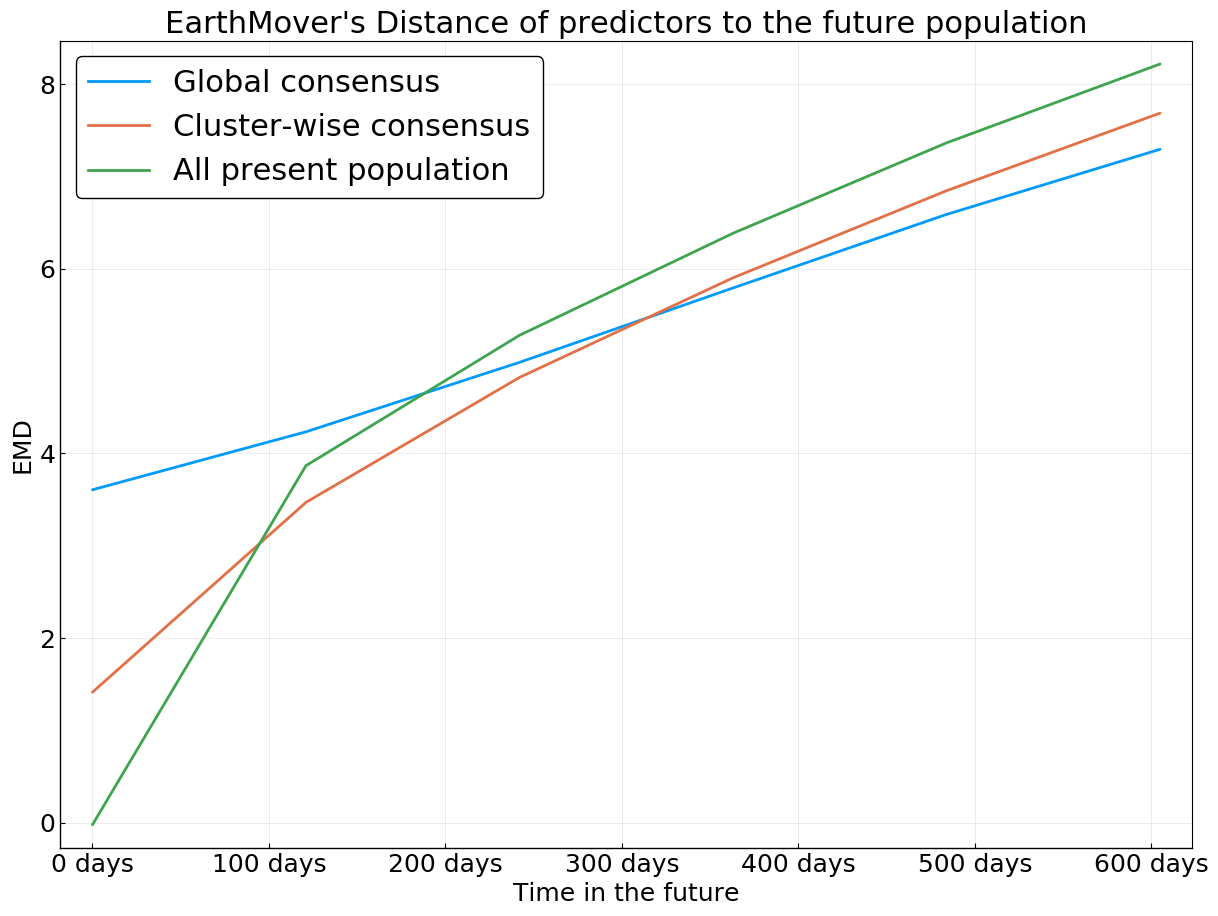

In [47]:
p = plot([x[1] for x in pred_cons][1:6], [x[2] for x in pred_cons][1:6], linewidth=2, label="Global consensus")
plot!([x[1] for x in pred_clusters][1:6], [x[2] for x in pred_clusters][1:6], linewidth=2, label="Cluster-wise consensus")
plot!([x[1] for x in pred_all][1:6], [x[2] for x in pred_all][1:6], linewidth=2, label="All present population")
# 
plot!(p, xlabel="Time in the future", ylabel="EMD", title = "EarthMover's Distance of predictors to the future population")
plot!(p, frame=:boxed, size=(1200,900), legendfontsize = 22, guidefontsize=18, tickfontsize=18, titlefontsize = 22)
savefig("tempplots_predictions/EMD_to_future.png")


### Weighing the clusters using the LBI value of the local maxima
The plot below shows it works uniformely worse than simply using the size of the cluster. 

In [83]:
## Warning : quite long to run! 
pred_clusters_bylbi = Dict(); 
idx = 1:length(datebins)-8
for i in idx
    db = datebins[i]
    print(db, "                                                                   \r")
    predictor_clusters = get_predictor_bylbi(clusters[db], clusters_lbi[db], fp) # Clusterwise consensuses
    for db2 in datebins[i:i+8]
        future_distribution = EarthMoversDistance.sequence_distribution(fp.datebin[db2])
        # Distance for all three predictors
        pred_clusters_bylbi[db2[1]-db[1]] = get(pred_clusters_bylbi, db2[1] - db[1], 0.) + EMD(predictor_clusters, future_distribution).emd / length(idx)
    end
end
pred_clusters_bylbi = sort(pred_clusters_bylbi);

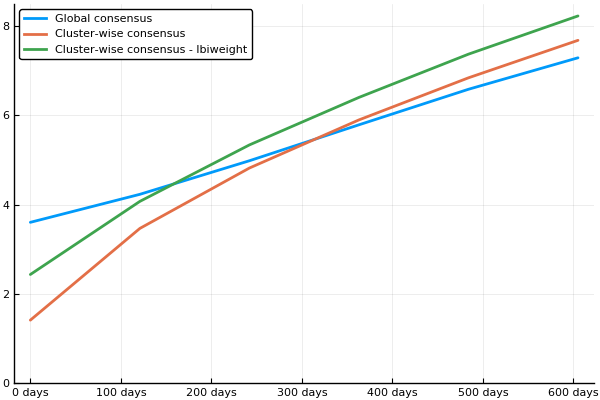

In [84]:
p = plot([x[1] for x in pred_cons][1:6], [x[2] for x in pred_cons][1:6], linewidth=2, label="Global consensus")
plot!([x[1] for x in pred_clusters][1:6], [x[2] for x in pred_clusters][1:6], linewidth=2, label="Cluster-wise consensus")
plot!([x[1] for x in pred_clusters_bylbi][1:6], [x[2] for x in pred_clusters_bylbi][1:6], linewidth=2, label="Cluster-wise consensus - lbiweight")
plot!(ylim=(0,8.5))